In [1]:

import glob
import re

BASE_FOLDER = "./raw"
cities = [re.search(r".*/([A-Z]+)", s).group(1) for s in glob.glob(f"{BASE_FOLDER}/*/")]
print(f'Found data for {len(cities)} cities: {", ".join(cities)}')

Found data for 4 cities: BARCELONA, MOSCOW, ANTWERP, BANGKOK


In [2]:
import pandas as pd
city = "BANGKOK"

df_in = pd.read_csv(f"{BASE_FOLDER}/{city}/hourly_processed_means_in_covid.csv")
df_pre = pd.read_csv(f"{BASE_FOLDER}/{city}/hourly_processed_means_pre.csv")

## Preprocessing Dataframes
df_in.drop('Unnamed: 0', axis=1, inplace=True)
df_pre.drop('Unnamed: 0', axis=1, inplace=True)

df_in['region_mean_volume'].fillna(df_in['region_mean_volume'].mean(), inplace=True)
df_pre['region_mean_volume'].fillna(df_pre['region_mean_volume'].mean(), inplace=True)


df_in

,date,weekday,hour,region_id,region_mean_volume
0,2020-04-01,2,0,0,6.950762
1,2020-04-01,2,0,8,5.105836
2,2020-04-01,2,0,15,6.499926
3,2020-04-01,2,0,23,8.379363
4,2020-04-01,2,0,31,6.162632
...,...,...,...,...,...
7915,2020-04-10,4,23,216,9.014970
7916,2020-04-10,4,23,224,7.616756
7917,2020-04-10,4,23,232,6.811404
7918,2020-04-10,4,23,240,7.266328


In [3]:
df_pre

,date,weekday,hour,region_id,region_mean_volume
0,2019-04-01,0,0,0,7.722891
1,2019-04-01,0,0,8,7.327109
2,2019-04-01,0,0,15,7.692432
3,2019-04-01,0,0,23,6.865300
4,2019-04-01,0,0,31,7.928614
...,...,...,...,...,...
7915,2019-04-10,2,23,216,6.366227
7916,2019-04-10,2,23,224,6.862663
7917,2019-04-10,2,23,232,6.056860
7918,2019-04-10,2,23,240,7.560450


In [4]:
id_in = df_in.groupby(["region_id"]).mean()
id_pre = df_pre.groupby(["region_id"]).mean()

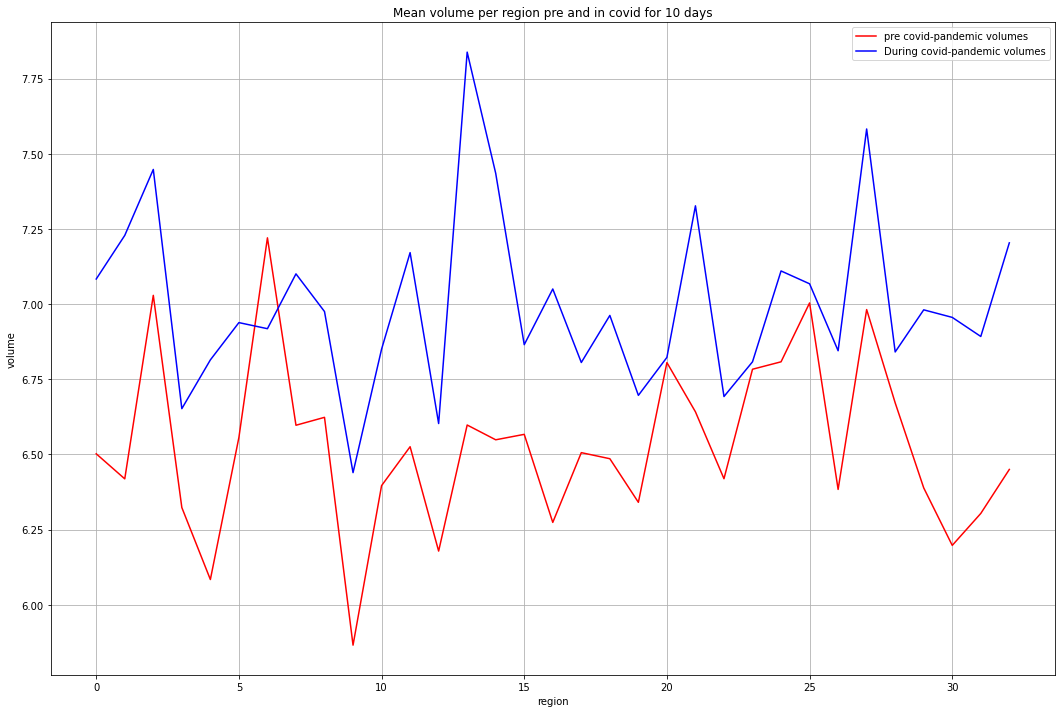

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = id_in.index
y = id_in.iloc[:,2].values
y2 = id_pre.iloc[:,2].values

fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
plt.grid()
plt.title("Mean volume per region pre and in covid for 10 days")
ax.set_xlabel("region")
ax.set_ylabel("volume")
ax.plot(y,"r", label="pre covid-pandemic volumes")
ax.plot(y2,"b", label="During covid-pandemic volumes")
ax.legend()
plt.show()

In [6]:
dates = df_pre.date.unique()
in_dates = df_in.date.unique()

In [7]:
region_in = df_in.groupby(["region_id","date","hour"]).mean()
region_pre = df_pre.groupby(["region_id","date","hour"]).mean()

In [8]:
filter1 = df_pre.date == dates[0]
filter2 = df_pre.region_id == 0
dpre= df_pre.copy() 
dpre.where(filter1&filter2,inplace=True)
dpre = dpre.dropna()
dpre

,date,weekday,hour,region_id,region_mean_volume
0,2019-04-01,0.0,0.0,0.0,7.722891
33,2019-04-01,0.0,1.0,0.0,7.052333
66,2019-04-01,0.0,2.0,0.0,6.851261
99,2019-04-01,0.0,3.0,0.0,5.809253
132,2019-04-01,0.0,4.0,0.0,6.166278
165,2019-04-01,0.0,5.0,0.0,6.246830
198,2019-04-01,0.0,6.0,0.0,6.684549
231,2019-04-01,0.0,7.0,0.0,6.800579
264,2019-04-01,0.0,8.0,0.0,8.285941
297,2019-04-01,0.0,9.0,0.0,7.394656


In [9]:
filter1 = df_in.date == in_dates[0]
filter2 = df_in.region_id == 0
di= df_in.copy() 
di.where(filter1&filter2,inplace=True)
di = di.dropna()
di

,date,weekday,hour,region_id,region_mean_volume
0,2020-04-01,2.0,0.0,0.0,6.950762
33,2020-04-01,2.0,1.0,0.0,6.407246
66,2020-04-01,2.0,2.0,0.0,7.313249
99,2020-04-01,2.0,3.0,0.0,5.820044
132,2020-04-01,2.0,4.0,0.0,5.485716
165,2020-04-01,2.0,5.0,0.0,5.668457
198,2020-04-01,2.0,6.0,0.0,6.055634
231,2020-04-01,2.0,7.0,0.0,6.284355
264,2020-04-01,2.0,8.0,0.0,6.207420
297,2020-04-01,2.0,9.0,0.0,6.278666


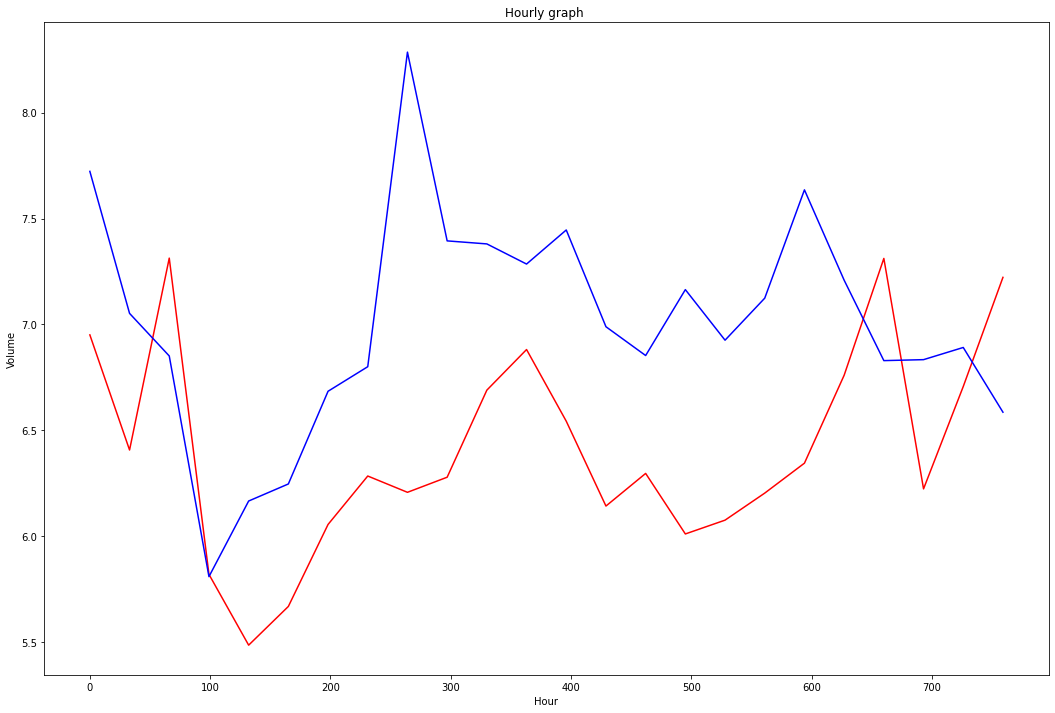

In [10]:
plt.figure(figsize=(18,12))
plt.title("Hourly graph ")
plt.xlabel("Hour")
plt.ylabel("Volume")
plt.plot(di.region_mean_volume,"r", label="During covid-pandemic volumes")
plt.plot(dpre.region_mean_volume,"b", label="pre covid-pandemic volumes")

plt.show()

In [12]:
import statsmodels.api as sm
from patsy import dmatrices

y, X = dmatrices('region_mean_volume ~ date + weekday + hour + region_id', data=df_pre, return_type='dataframe')

y2, X2 = dmatrices('region_mean_volume ~ date + weekday + hour + region_id', data=df_in, return_type='dataframe')

In [13]:
X[:3]

,Intercept,date[T.2019-04-02],date[T.2019-04-03],date[T.2019-04-04],date[T.2019-04-05],date[T.2019-04-06],date[T.2019-04-07],date[T.2019-04-08],date[T.2019-04-09],date[T.2019-04-10],weekday,hour,region_id
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0


In [16]:
y[:3]

,region_mean_volume
0,7.722891
1,7.327109
2,7.692432


In [14]:
mod = sm.OLS(y, X)
mod2 = sm.OLS(y2, X2)

In [17]:
res = mod.fit()       # Fit model
print(res.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:     region_mean_volume   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     13.70
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           2.03e-26
Time:                        11:56:32   Log-Likelihood:                -11305.
No. Observations:                7920   AIC:                         2.263e+04
Df Residuals:                    7908   BIC:                         2.272e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.8316      0

In [18]:
res2 = mod2.fit()       # Fit model
print(res2.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:     region_mean_volume   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     36.89
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           4.49e-78
Time:                        11:56:44   Log-Likelihood:                -14349.
No. Observations:                7920   AIC:                         2.872e+04
Df Residuals:                    7908   BIC:                         2.881e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.5703      0